In [797]:
!pip install feature-engine


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [799]:
df = pd.read_csv('/kaggle/input/vehicle-sales-data/car_prices.csv')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [800]:
df.drop(['vin','saledate','state'],axis=1,inplace=True)

In [801]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
dtype: int64

In [802]:
df.isnull().sum()/len(df)*100

year             0.000000
make             1.843292
model            1.860829
trim             1.905922
body             2.361154
transmission    11.694287
condition        2.115107
odometer         0.016821
color            0.134028
interior         0.134028
seller           0.000000
mmr              0.006800
sellingprice     0.002147
dtype: float64

In [803]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [804]:
df.describe(include='object')

,make,model,trim,body,transmission,color,interior,seller
count,548536,548438,548186,545642,493485,558088,558088,558837
unique,96,973,1963,87,4,46,17,14263
top,Ford,Altima,Base,Sedan,automatic,black,black,nissan-infiniti lt
freq,93554,19349,55817,199437,475915,110970,244329,19693


In [805]:
a = df.describe()
a.columns

Index(['year', 'condition', 'odometer', 'mmr', 'sellingprice'], dtype='object')

In [806]:
b = df.describe(include='object')
b.columns

Index(['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior',
       'seller'],
      dtype='object')

In [807]:
df['sellingprice'].median()


12100.0

In [808]:
df['mmr'].median()

12250.0

In [809]:
df['odometer'].median()

52254.0

In [810]:
df['make']=df['make'].fillna('Ford')
df['model']=df['model'].fillna('Altima')
df['trim']=df['trim'].fillna('Base')
df['body']=df['body'].fillna('Sedan')
df['transmission']=df['transmission'].fillna('automatic')
df['color']=df['color'].fillna('black')
df['interior']=df['interior'].fillna('black')
df['condition']=df['condition'].fillna(30.672365)
df['odometer']=df['odometer'].fillna(52266.0)
df['mmr']=df['mmr'].fillna(12250.0)
df['sellingprice']=df['sellingprice'].fillna(12100.0)

In [811]:
df.duplicated().value_counts()

False    558837
Name: count, dtype: int64

In [812]:
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sellingprice', ylabel='Count'>

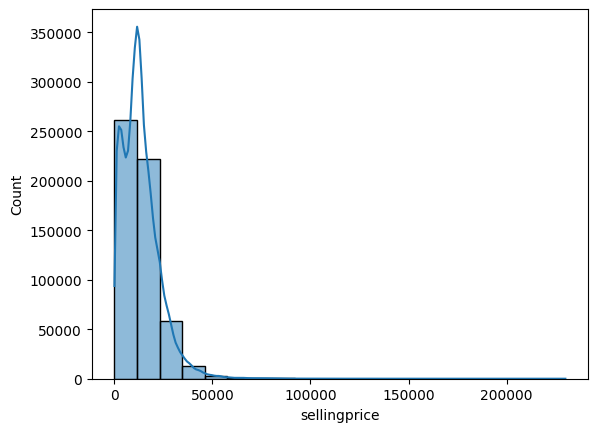

In [813]:
sns.histplot(x='sellingprice',data=df,kde=True,bins=20)

In [5]:
#sns.histplot(np.log10(df['sellingprice']),kde=True,fill=True,bins=50)

NameError: name 'df' is not defined

In [815]:
# (df.astype(str) == '?').any()
# This code replaces all occurrences of '?' with pd.NA using the replace function and then removes rows with missing values using the dropna method.
# df = df.replace('?', pd.NA).dropna()

In [816]:
df['sellingprice'].skew()

1.9534737517647272

In [817]:
# sns.histplot(np.log10(df['sellingprice']),kde=True,bins=20)

<Axes: xlabel='sellingprice'>

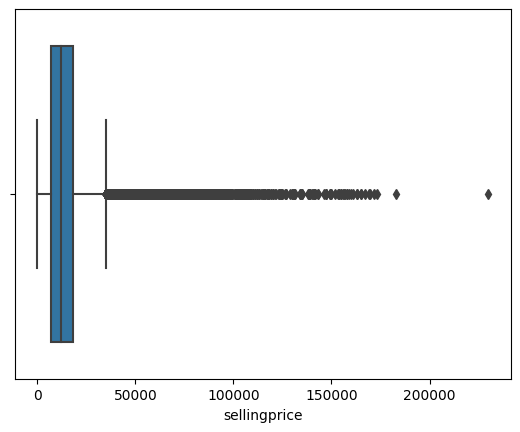

In [818]:
sns.boxplot(x='sellingprice',data=df)

<Axes: xlabel='mmr'>

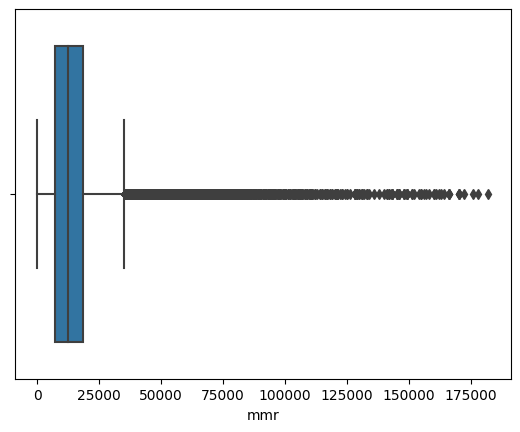

In [819]:
sns.boxplot(x='mmr',data=df)

<Axes: xlabel='odometer'>

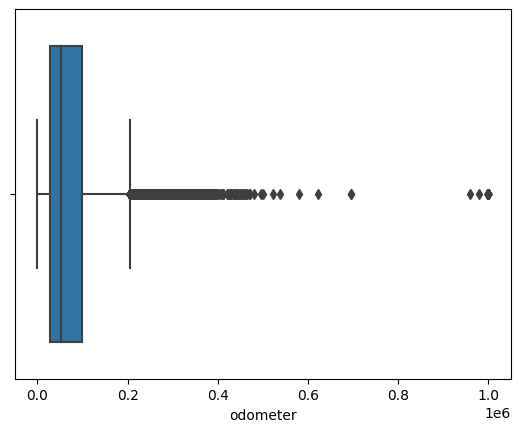

In [820]:
sns.boxplot(x='odometer',data=df)

<Axes: xlabel='condition'>

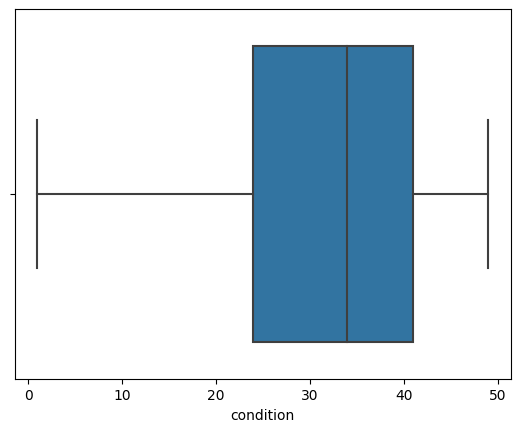

In [821]:
sns.boxplot(x='condition',data=df)

In [822]:
# winsor = Winsorizer(capping_method = 'quantiles', tail='both',variables=['sellingprice','mmr','condition'])

<Axes: xlabel='sellingprice'>

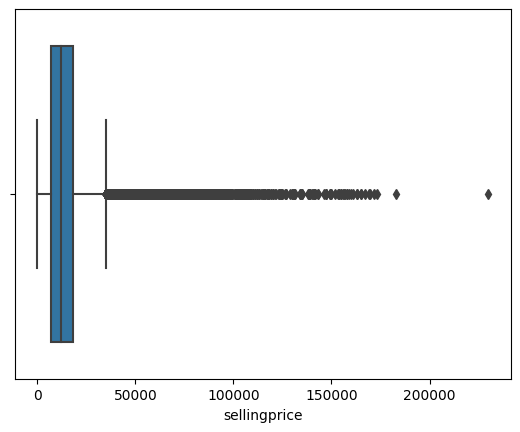

In [823]:
sns.boxplot(x='sellingprice',data=df)

In [824]:
from sklearn.preprocessing import LabelEncoder

In [825]:
# le = LabelEncoder()
# df['make'] = le.fit_transform(df['make'])
# df['model'] = le.fit_transform(df['model'])
# df['trim'] = le.fit_transform(df['trim'])
# df['body'] = le.fit_transform(df['body'])
# df['transmission'] = le.fit_transform(df['transmission'])
# df['color'] = le.fit_transform(df['color'])
# df['interior'] = le.fit_transform(df['interior'])
# df['seller'] = le.fit_transform(df['seller'])

In [826]:
df.head()

,year,make,model,trim,body,transmission,condition,odometer,color,interior,seller,mmr,sellingprice
0,2015,Kia,Sorento,LX,SUV,automatic,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0
1,2015,Kia,Sorento,LX,SUV,automatic,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0
3,2015,Volvo,S60,T5,Sedan,automatic,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0


In [827]:
winsor = Winsorizer(capping_method = 'quantiles', tail='both',variables=['mmr','odometer','sellingprice'])

In [828]:
winsor.fit(df)

Winsorizer(capping_method='quantiles', fold=0.05, tail='both',
           variables=['mmr', 'odometer', 'sellingprice'])

In [829]:
cleared_data = winsor.transform(df)

After handling outliers

<Axes: xlabel='sellingprice'>

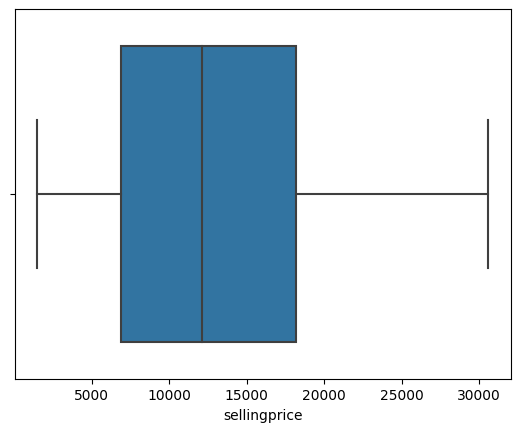

In [830]:
sns.boxplot(x='sellingprice',data=cleared_data)

In [831]:
cleared_data['sellingprice'].skew()

0.5152821078440581

<Axes: xlabel='mmr'>

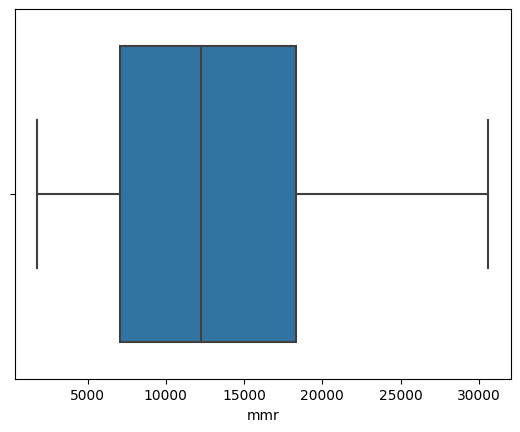

In [832]:
sns.boxplot(x='mmr',data=cleared_data)

In [833]:
cleared_data['mmr'].skew()

0.5251307096512262

<Axes: xlabel='odometer'>

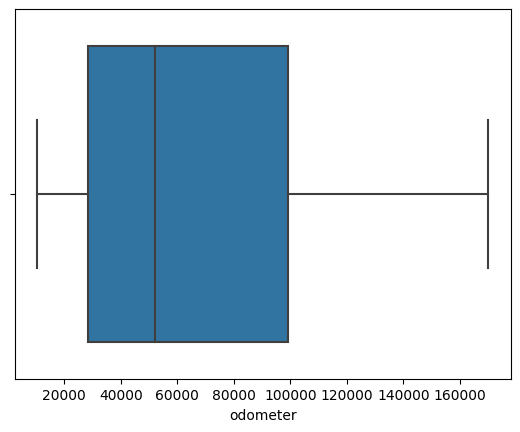

In [834]:
sns.boxplot(x='odometer',data=cleared_data)

In [835]:
cleared_data['odometer'].skew()

0.7655500863654

In [836]:
cleared_data['model'].value_counts()

model
Altima        29748
F-150         14479
Fusion        12946
Camry         12545
Escape        11861
              ...  
rrs               1
golf              1
g500              1
tahoe             1
458 Italia        1
Name: count, Length: 973, dtype: int64

In [837]:
cleared_data.duplicated().value_counts()

False    558560
True        277
Name: count, dtype: int64

In [838]:
cleared_data = cleared_data.drop_duplicates()
cleared_data.head()

,year,make,model,trim,body,transmission,condition,odometer,color,interior,seller,mmr,sellingprice
0,2015,Kia,Sorento,LX,SUV,automatic,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0
1,2015,Kia,Sorento,LX,SUV,automatic,5.0,10513.0,white,beige,kia motors america inc,20800.0,21500.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,45.0,10513.0,gray,black,financial services remarketing (lease),30600.0,30000.0
3,2015,Volvo,S60,T5,Sedan,automatic,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,43.0,10513.0,gray,black,financial services remarketing (lease),30600.0,30600.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sellingprice', ylabel='Count'>

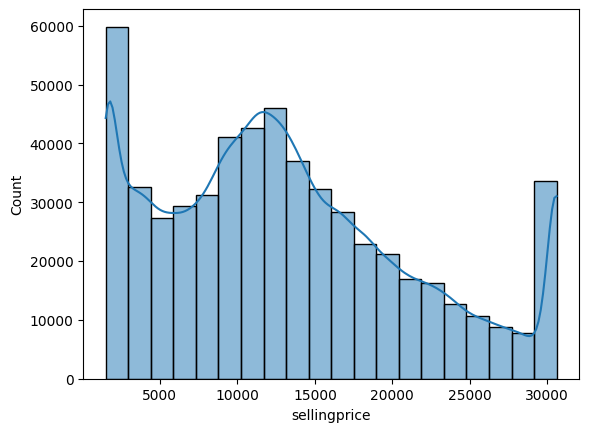

In [839]:
sns.histplot(x='sellingprice',data=cleared_data,kde=True,bins=20)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='condition', ylabel='Count'>

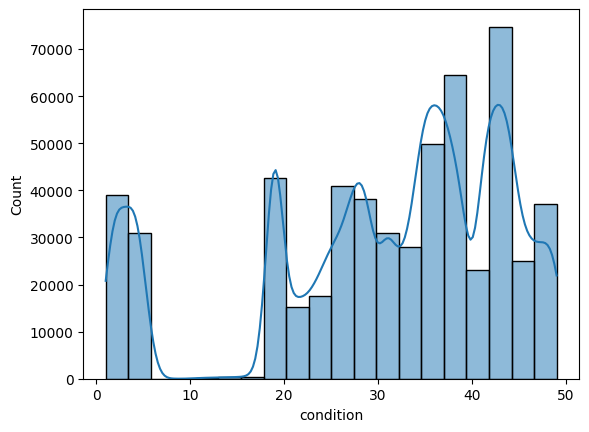

In [840]:
sns.histplot(x='condition',data=cleared_data,kde=True,bins=20)

In [841]:
cleared_data['condition'].skew()

-0.8424378160781753

<Axes: xlabel='make', ylabel='count'>

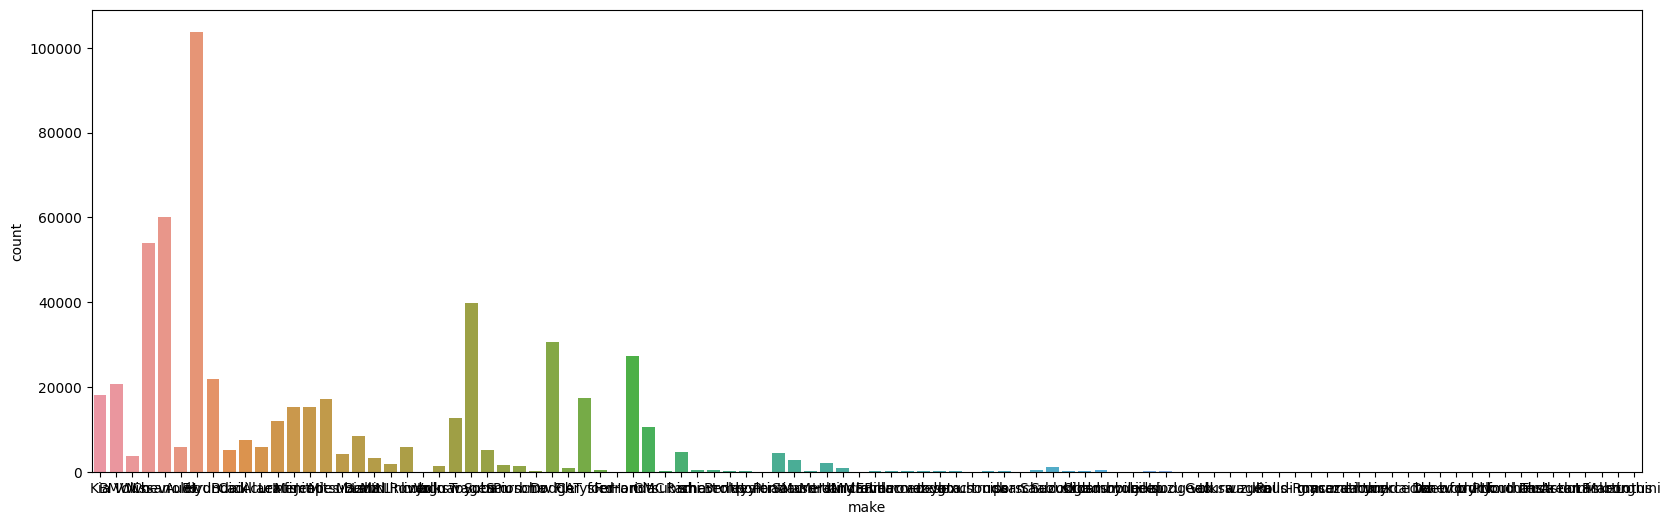

In [842]:
plt.figure(figsize=(20,6))

sns.countplot(x='make',data=cleared_data)

In [ ]:
plt.figure(figsize=(40,30))
cleared_data['make'].value_counts().plot(kind='bar')

<Axes: xlabel='make'>

In [844]:
percentage = cleared_data['make'].value_counts()/len(df) 
percentage

make
Ford          0.185745
Chevrolet     0.107688
Nissan        0.096527
Toyota        0.071339
Dodge         0.054950
                ...   
airstream     0.000002
ford tk       0.000002
chev truck    0.000002
hyundai tk    0.000002
Lotus         0.000002
Name: count, Length: 96, dtype: float64

In [ ]:
plt.figure(figsize = (50,10))
cleared_data['make'].value_counts().plot(kind = 'pie',autopct = '%.3f%%',explode = [0.1 for i in range(len(percentage))],shadow = True)

<Axes: ylabel='count'>

In [846]:
le = LabelEncoder()
cleared_data['make'] = le.fit_transform(cleared_data['make'])
cleared_data['model'] = le.fit_transform(cleared_data['model'])
cleared_data['trim'] = le.fit_transform(cleared_data['trim'])
cleared_data['body'] = le.fit_transform(cleared_data['body'])
cleared_data['transmission'] = le.fit_transform(cleared_data['transmission'])
cleared_data['color'] = le.fit_transform(cleared_data['color'])
cleared_data['interior'] = le.fit_transform(cleared_data['interior'])
cleared_data['seller'] = le.fit_transform(cleared_data['seller'])

In [847]:
cleared_data.head()

,year,make,model,trim,body,transmission,condition,odometer,color,interior,seller,mmr,sellingprice
0,2015,24,658,998,36,1,5.0,16639.0,43,1,7202,20500.0,21500.0
1,2015,24,658,998,36,1,5.0,10513.0,43,0,7202,20800.0,21500.0
2,2014,3,9,283,37,1,45.0,10513.0,33,1,4978,30600.0,30000.0
3,2015,51,596,1399,37,1,41.0,14282.0,43,1,13795,27500.0,27750.0
4,2014,3,42,498,37,1,43.0,10513.0,33,1,4978,30600.0,30600.0


In [848]:
X = cleared_data.drop(['sellingprice'],axis=1) #input features
y = cleared_data['sellingprice'] # target variable

In [849]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [850]:
X_train.shape

(390992, 12)

In [851]:
y_train.shape

(390992,)

In [852]:
# Normalization
scaler1 = StandardScaler() #(x-u)/sigma
'''
fit : Mean value, Standard_deviation(fit)
transform : x-Mean/standard_deviation    
'''
X_train = scaler1.fit_transform(X_train)
X_test = scaler1.transform(X_test)

# scaler2 = StandardScaler()
# y_train = scaler2.fit_transform(y_train)
# y_test = scaler2.transform(y_test)

In [853]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [854]:
y_pred = lin_reg.predict(X_test)
y_pred

array([30266.16176215,  7418.89570866, 12177.15075758, ...,
        6255.60369356, 15037.57702022, 17767.8937627 ])

In [855]:
y_test

362160    30600.0
46610      6500.0
56242     10700.0
420007    24200.0
10756     14500.0
           ...   
175332    12700.0
282705    29300.0
155315     5800.0
113098    14800.0
177447    17600.0
Name: sellingprice, Length: 167568, dtype: float64

In [856]:
lin_reg.coef_

array([-2.00329892e+02, -1.60114373e+01,  1.10824683e+01, -7.53250353e+00,
        1.72373298e+01, -3.48648009e+01,  4.69534471e+02, -1.07646895e+02,
        4.49789009e+01, -3.25934567e+01,  6.63006580e+00,  7.83481894e+03])

In [857]:
lin_reg.intercept_

13153.743529279376

In [858]:
mean_squared_error(y_pred,y_test)

2189576.071848322

In [859]:
lin_reg.score(X_test,y_test)

0.9664720919740432

In [860]:
# Applying 5-Fold Cross Validation

scores = cross_val_score(lin_reg, X_train, y_train, cv = 5, scoring='r2')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.96580961 0.96649434 0.96605267 0.96686876 0.9665395 ]


In [861]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9664


In [862]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge = Ridge()

grid_search = GridSearchCV(estimator=ridge, param_grid=parameters, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best R2 score found: ", grid_search.best_score_)


Best parameters found:  {'alpha': 1}
Best R2 score found:  0.9663529744642216
